In [27]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
# Load dataset
dataset = pd.read_csv('./CancerPScreenRaw2020.csv')
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,137.573925,151.719162,0.596020,23.629505,7.030695,0.580842,20.306659,40.032476,59.758293,0.0
1,116.496435,144.131710,0.559442,21.142454,7.302688,1.792108,16.222173,30.652238,45.082303,0.0
2,226.076027,194.559764,0.594095,29.937782,9.526411,10.851462,28.283713,45.715964,63.148214,1.0
3,100.359149,134.248998,0.555051,20.580689,5.855500,9.848190,20.564519,31.280848,41.997178,2.0
4,131.986704,150.623324,0.579484,23.986106,7.273814,30.388115,22.448860,14.509605,6.570351,2.0


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 10 columns):
V1       1680 non-null float64
V2       1680 non-null float64
V3       1680 non-null float64
V4       1680 non-null float64
V5       1680 non-null float64
V6       1680 non-null float64
V7       1680 non-null float64
V8       1680 non-null float64
V9       1680 non-null float64
Class    1680 non-null float64
dtypes: float64(10)
memory usage: 132.1 KB


In [30]:
dataset.isnull().sum()

V1       10
V2       10
V3       10
V4       10
V5       10
V6       10
V7       10
V8       10
V9       10
Class    10
dtype: int64

In [31]:
dataset["Class"].value_counts()

2.0    560
1.0    560
0.0    560
Name: Class, dtype: int64

In [32]:
dataset.isnull().any()

V1       True
V2       True
V3       True
V4       True
V5       True
V6       True
V7       True
V8       True
V9       True
Class    True
dtype: bool

In [33]:
nan_rows = dataset[dataset.isnull().T.any().T]

In [8]:
print(nan_rows)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  Class
264 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
265 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
266 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
267 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
268 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
269 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
270 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
271 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
272 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
273 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN


In [9]:
ds_clean = dataset.dropna().reset_index(drop=True)
ds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 10 columns):
V1       1680 non-null float64
V2       1680 non-null float64
V3       1680 non-null float64
V4       1680 non-null float64
V5       1680 non-null float64
V6       1680 non-null float64
V7       1680 non-null float64
V8       1680 non-null float64
V9       1680 non-null float64
Class    1680 non-null float64
dtypes: float64(10)
memory usage: 131.3 KB


In [34]:
#Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(ds_clean.drop('Class', axis=1),0,list(ds_clean.drop('Class', axis=1)))
print(ds_clean.drop('Class', axis=1).loc[Outliers_to_drop])

              V1          V2        V3         V4         V5         V6  \
605   476.426612  322.386873  0.850293  46.666363  17.256893  23.699211   
609   442.081040  309.071137  0.857025  42.796644  16.176084  28.992396   
678   443.833590  309.803533  0.857603  43.206179  17.007015  37.726836   
689   472.345889  314.954572  0.883631  45.073220  17.613278  27.259269   
602   393.590804  293.177715  0.849333  44.599281  14.984819   5.475096   
619   398.562429  299.628865  0.823253  43.948256  14.680160  12.209611   
629   390.293723  297.470681  0.817596  45.059244  13.669262   4.980222   
633   393.590804  293.177715  0.849333  44.599281  14.984819   5.475096   
641   390.293723  297.470681  0.817596  45.059244  13.669262   4.980222   
656   397.316597  293.177715  0.856254  42.253631  15.768422  10.304523   
663   412.395283  302.518578  0.835196  43.906864  15.652903   9.505375   
667   388.650383  294.605237  0.829498  45.003366  14.347071  27.783474   
688   406.917808  302.880

In [35]:
#Create New Dataset without Outliers
good_data=ds_clean.drop(ds_clean.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 10 columns):
V1       1560 non-null float64
V2       1560 non-null float64
V3       1560 non-null float64
V4       1560 non-null float64
V5       1560 non-null float64
V6       1560 non-null float64
V7       1560 non-null float64
V8       1560 non-null float64
V9       1560 non-null float64
Class    1560 non-null float64
dtypes: float64(10)
memory usage: 122.0 KB


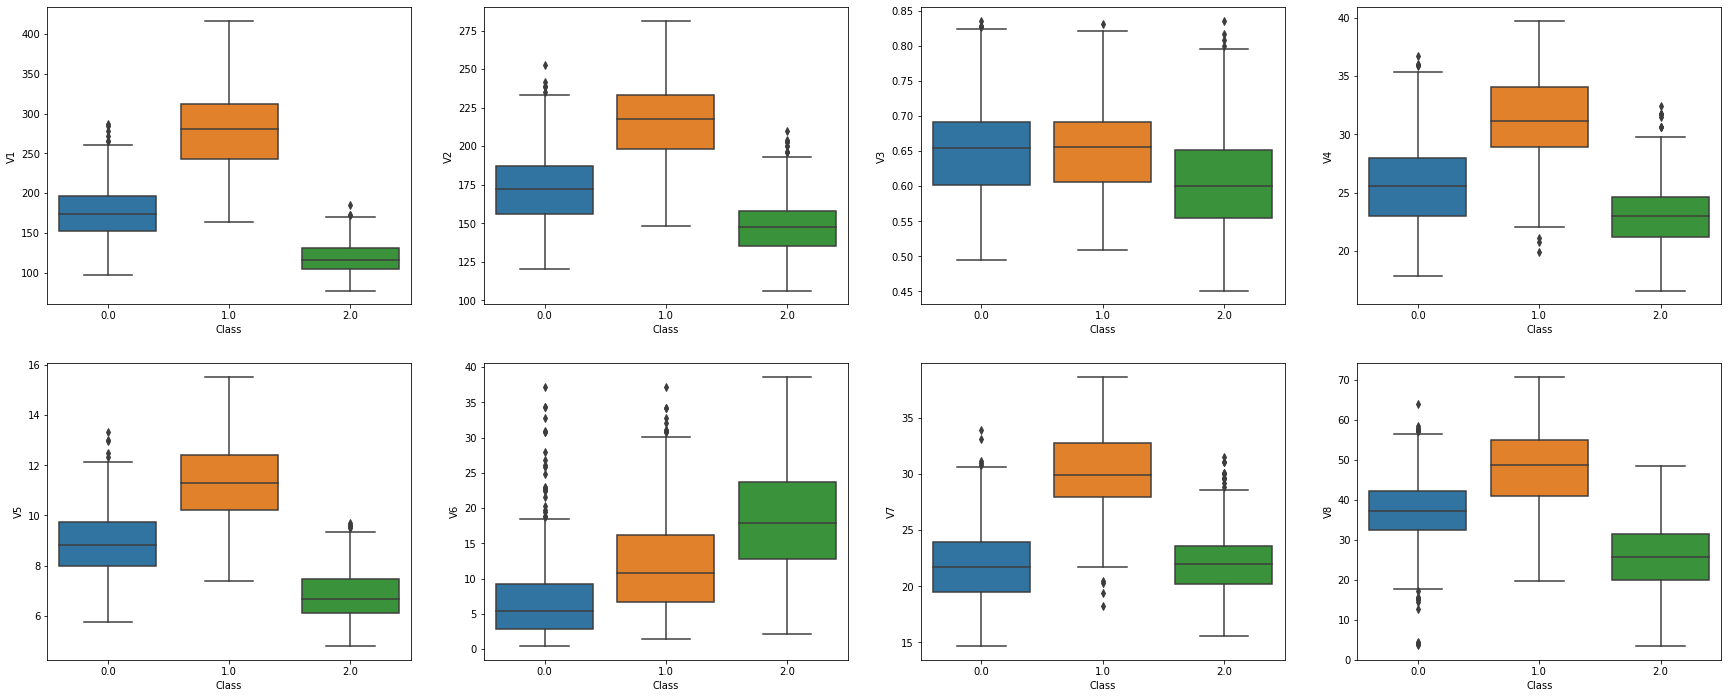

In [12]:
# Boxplot of Features

fig,ax=plt.subplots(nrows=2 ,ncols=4)

sns.boxplot(data=good_data,y='V1',x='Class',ax=ax[0,0])
sns.boxplot(data=good_data,y='V2',x='Class',ax=ax[0,1])
sns.boxplot(data=good_data,y='V3',x='Class',ax=ax[0,2])
sns.boxplot(data=good_data,y='V4',x='Class',ax=ax[0,3])
sns.boxplot(data=good_data,y='V5',x='Class',ax=ax[1,0])
sns.boxplot(data=good_data,y='V6',x='Class',ax=ax[1,1])
sns.boxplot(data=good_data,y='V7',x='Class',ax=ax[1,2])
sns.boxplot(data=good_data,y='V8',x='Class',ax=ax[1,3])
fig.set_figwidth(30)
fig.set_figheight(12)

C:\Users\liter\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\liter\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


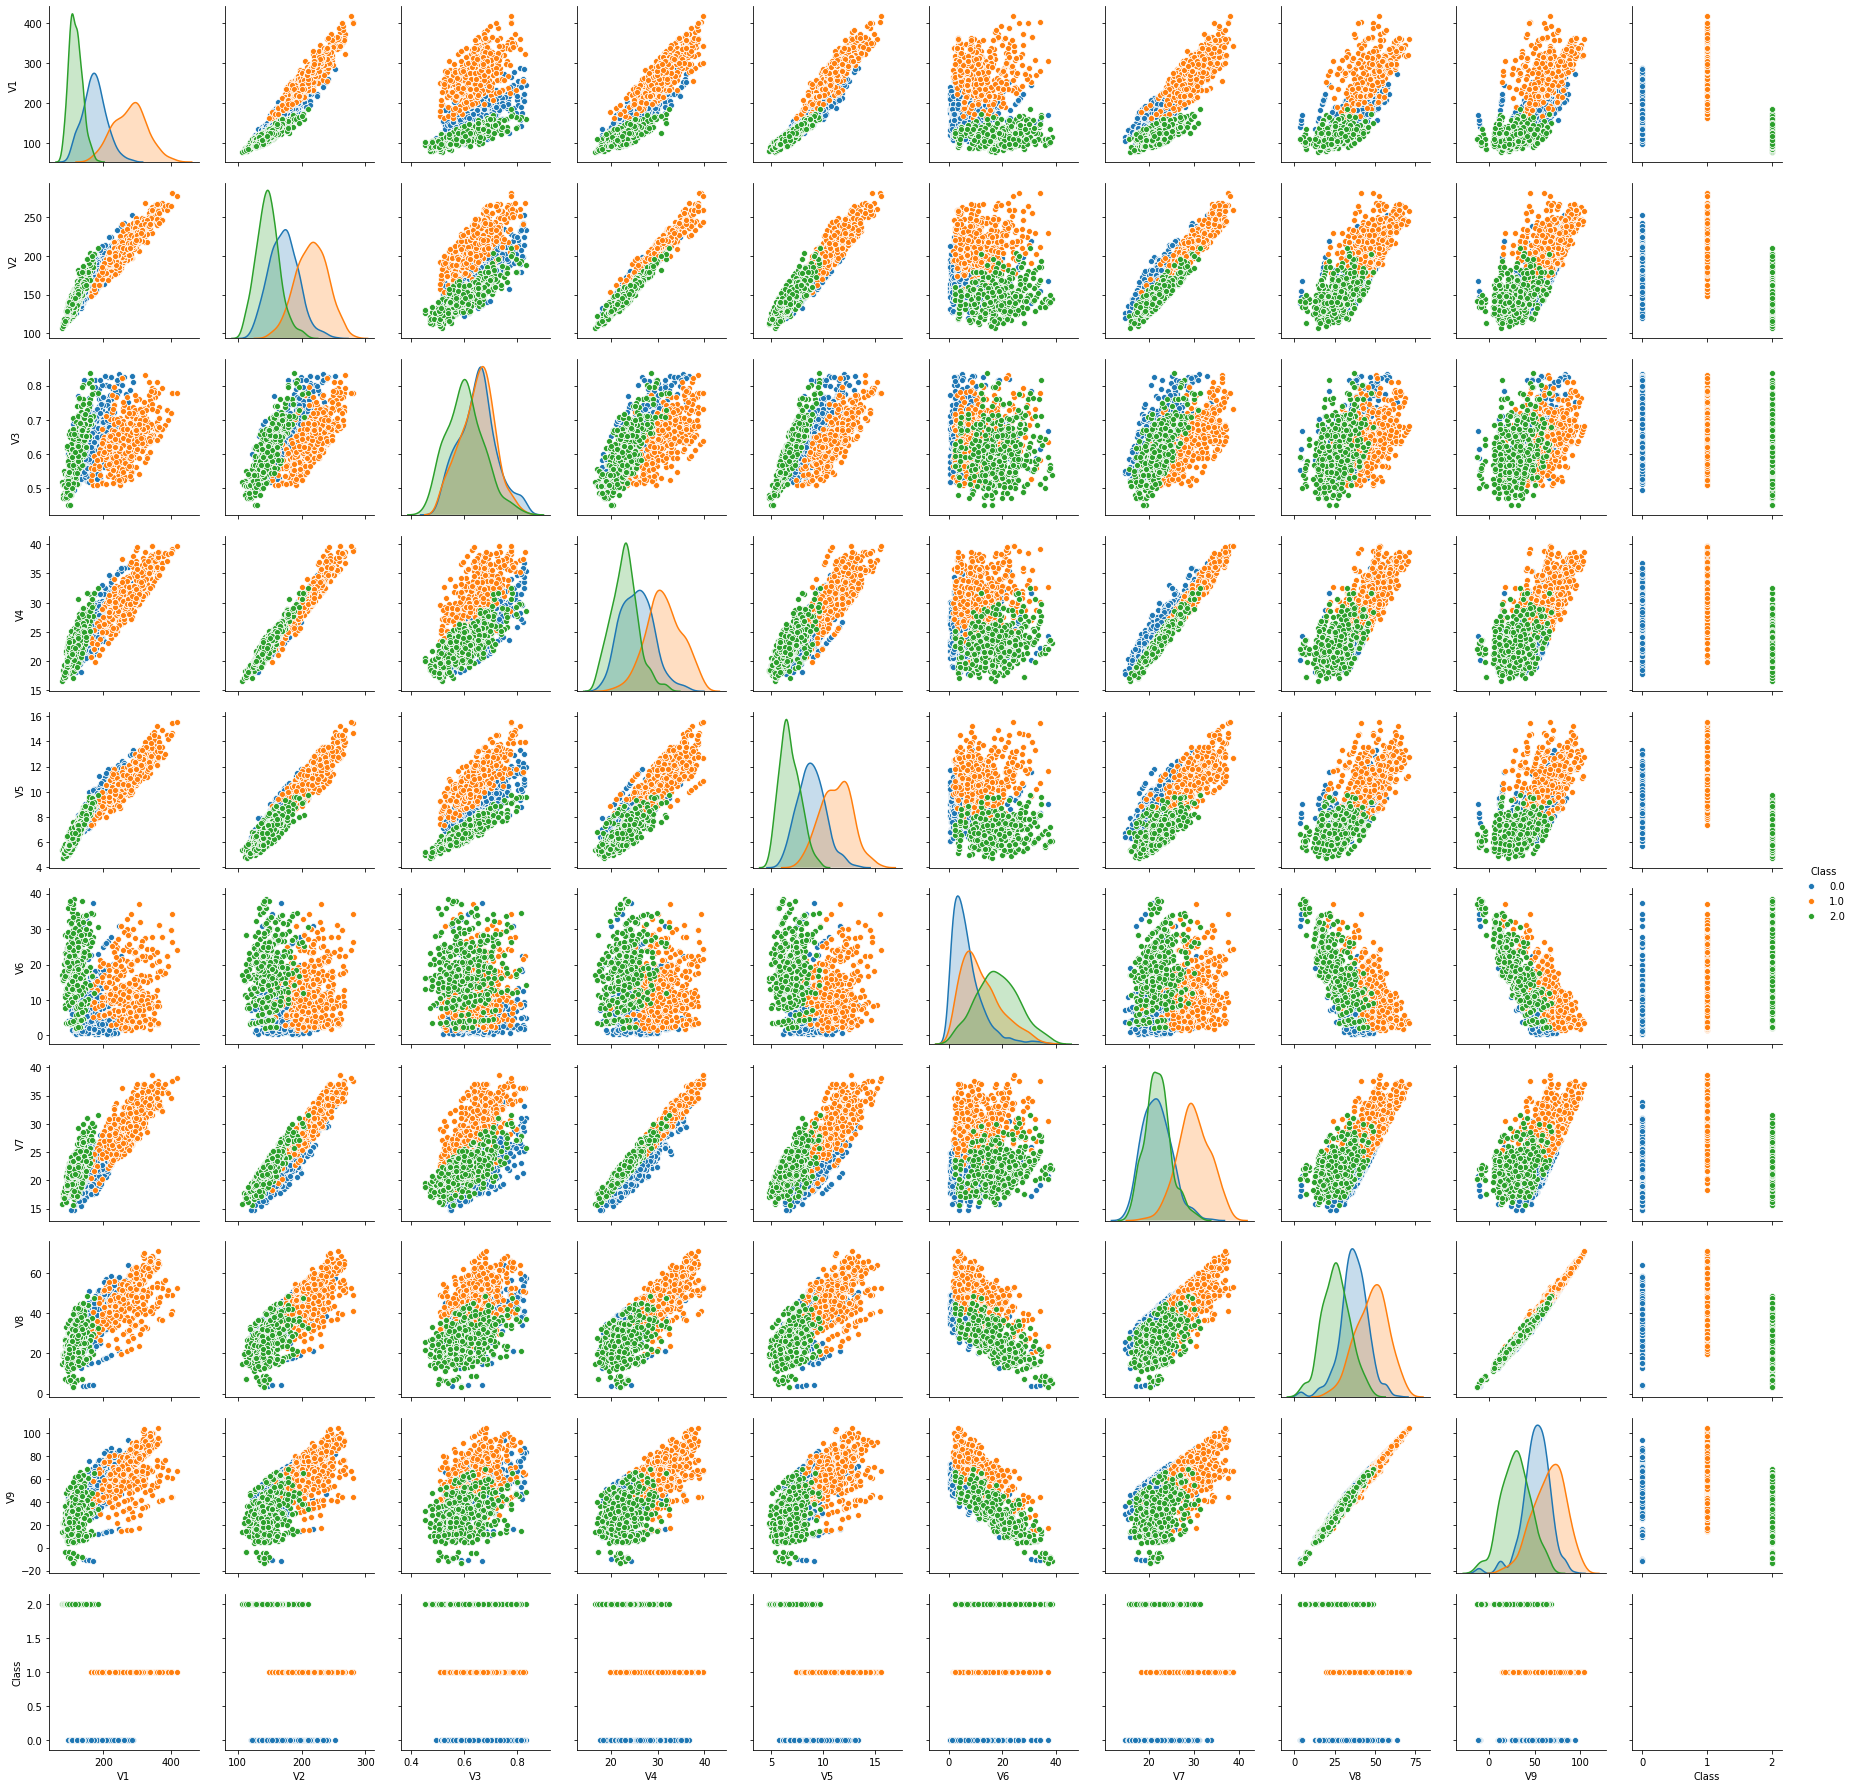

In [13]:
# Visualization of All Variables
pairplot = sns.pairplot(good_data, hue="Class")
pairplot

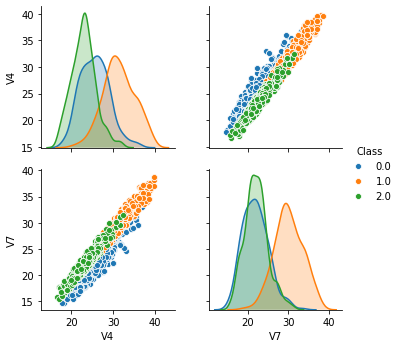

In [14]:
g = sns.pairplot(good_data, vars=["V4", "V7"], hue = 'Class')

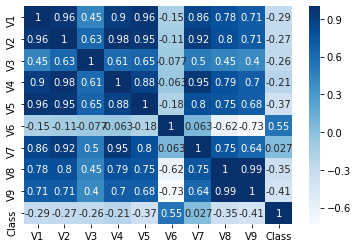

In [15]:
sns.heatmap(good_data.corr(),annot=True,cmap="Blues")

In [16]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=ds_clean.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(good_data,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('V2', 'V1'), ('V4', 'V1'), ('V4', 'V2'), ('V5', 'V1'), ('V5', 'V2'), ('V5', 'V4'), ('V7', 'V1'), ('V7', 'V2'), ('V7', 'V4'), ('V7', 'V5'), ('V9', 'V8')]


Class Split
0.0    540
1.0    514
2.0    506
Name: Class, dtype: int64


Text(0, 0.5, 'Count')

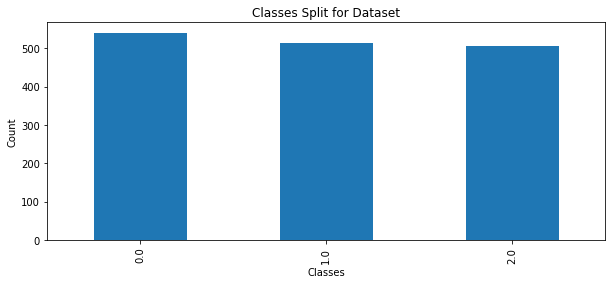

In [17]:
#Class Balance
print('Class Split')
print(good_data['Class'].value_counts())
good_data['Class'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
#plt.ylabel('Count')

In [36]:
# Save data set as new file and read in new file
good_data.to_csv(r'CapstoneModelDataset.csv', index = False, header = 'True')
good_data = pd.read_csv('./CapstoneModelDataset.csv')
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
dataset2 = pp.ProfileReport(good_data)
dataset2.to_file('Capstone.html')
display(IFrame('Capstone.html', width=900, height=350))

In [19]:
# Prepare for Models for Comparison
# 
#Create x and y variables
x = good_data.drop('Class', axis=1).values
y = good_data['Class'].values

# Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.20,random_state=100)

#Scale x variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

#Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


#Create Pipeline

pipeline =[]


#Logistic Regression
pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))])
pipeline.insert(0,pipe_logreg)

#SVM
pipe_svm = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC())])
pipeline.insert(1,pipe_svm)

#Random Forest
pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])
pipeline.insert(2,pipe_rdf)

# Set grid search params 

modelpara =[]


param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2'],
                   'clf__solver':['newton-cg', 'sag', 'saga' , 'lbfgs']}
modelpara.insert(0,param_gridlogreg)

param_gridsvm = { 
           "clf__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
           "clf__gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
           "clf__C" : [1, 10, 100, 1000]}
modelpara.insert(1,param_gridsvm)   

param_gridrdf = {
            'clf__n_estimators': [100,150,200],
            'clf__max_features': ['auto', 'log2', 'sqrt'],
            'clf__bootstrap': [True, False]}
modelpara.insert(2,param_gridrdf)

In [21]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',
                                                            n_jobs=1,random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='lower right')
    plt.ylim([0.6, 1.01])
    plt.show()


 Log Reg Learning Curve


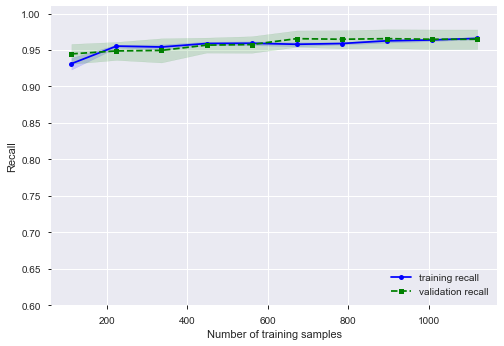


 SVM Learning Curve


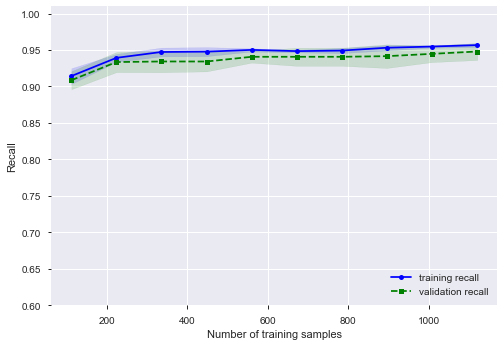


 Random Forest Learning Curve


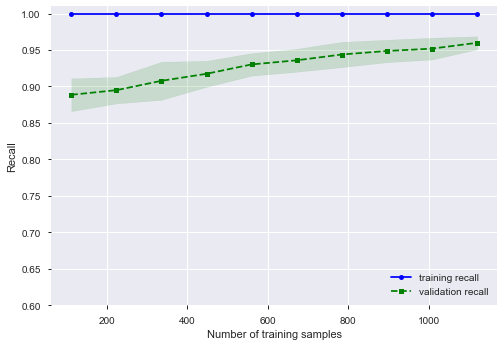

In [22]:
#Plot Learning Curve
print('\n Log Reg Learning Curve')
plot_learning_curves(pipe_logreg)
print('\n SVM Learning Curve')
plot_learning_curves(pipe_svm)
print('\n Random Forest Learning Curve')
plot_learning_curves(pipe_rdf)

Model Evaluation Original Model - Recall
Log Reg 0.97 +/- 0.01
SVM 0.96 +/- 0.01
RF 0.96 +/- 0.02




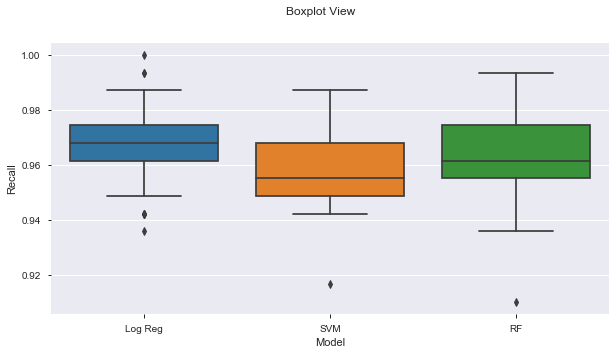

In [23]:
#Model Analysis - Original Model
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Log Reg',pipe_logreg))
models.append(('SVM',pipe_svm))
models.append(('RF',pipe_rdf))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation Original Model - Recall')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [24]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=-1, cv=cv2)
    gs_clf = gs_clf.fit(x_train2, y_train)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoreACC = cross_val_score(gs_clf, x_2, y, 
                             scoring='accuracy', cv=5,
                             n_jobs= -1)
    
    scorePM = cross_val_score(gs_clf, x_2, y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoreRM = cross_val_score(gs_clf, x_2, y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('Opimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    target_names=['0','1','2']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
    print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
    print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
    print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))
    print('\n')

In [25]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

Opimized Model

Model Name: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=100, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Best Parameters: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}

 [[103   2   3]
 [  0 103   0]
 [  1   0 100]]

               precision    recall  f1-score   support

           0       0.99      0.95      0.97       108
           1       0.98      1.00      0.99       103
           2       0.97      0.99      0.98       101

    accuracy                           0.98       312
   macro avg       0.98      0.98      0.98       312
weighted avg       0.98      0.98      0.98       312


NestedCV Accuracy(weighted) :0.97 +/-0.01 
NestedCV Precision(weighted) :0.97 +/-0.01 
NestedCV Recall(weighted) :0.97 +

Log Reg

Permutation Importance




Weight,Feature
0.3276 ± 0.0534,V7
0.2417 ± 0.0305,V4
0.2199 ± 0.0165,V6
0.1987 ± 0.0356,V1
0.1327 ± 0.0350,V5
0.0641 ± 0.0211,V3
0.0551 ± 0.0159,V8
0.0269 ± 0.0138,V2
0.0135 ± 0.0124,V9


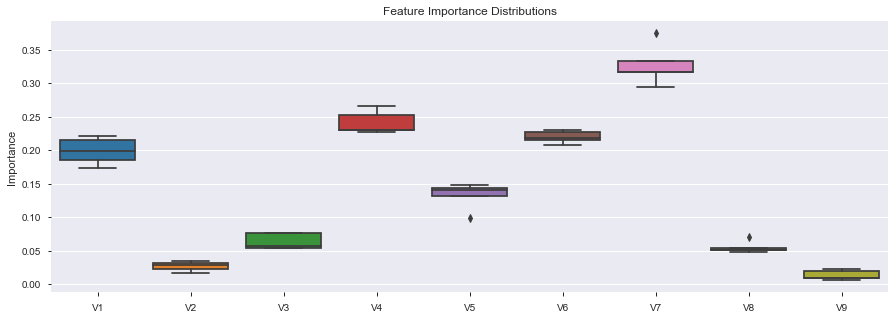

SVM

Permutation Importance




Weight,Feature
0.1897 ± 0.0400,V7
0.1769 ± 0.0323,V1
0.1468 ± 0.0196,V6
0.1167 ± 0.0188,V5
0.0994 ± 0.0260,V4
0.0840 ± 0.0273,V3
0.0622 ± 0.0119,V2
0.0212 ± 0.0112,V8
0.0058 ± 0.0026,V9


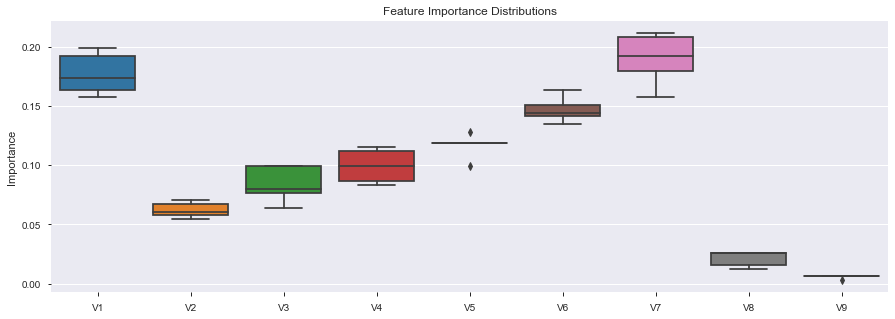

RF

Permutation Importance




Weight,Feature
0.4788 ± 0.0567,V1
0.1840 ± 0.0283,V7
0.0596 ± 0.0170,V6
0.0244 ± 0.0119,V3
0.0083 ± 0.0031,V4
0.0064 ± 0.0070,V9
0.0038 ± 0.0094,V5
-0.0013 ± 0.0031,V8
-0.0051 ± 0.0065,V2


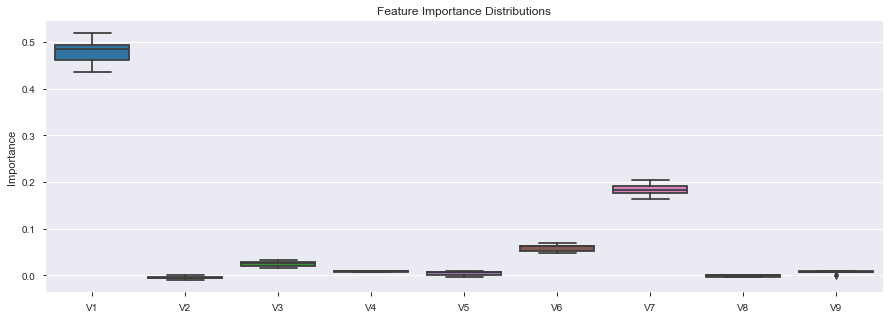

In [26]:
#Next Step - Feature Importance
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

for name, model in models:
    print(name)
    perm=PermutationImportance(model.fit(x_train2,y_train),random_state=100).fit(x_test2,y_test)
    features=dataset.drop('Class', axis=1).columns
    print('\nPermutation Importance')
    print('\n')
    df=eli5.show_weights(perm,feature_names=dataset.drop('Class', axis=1).columns.tolist())
    display(df)
    df2= pd.DataFrame(data=perm.results_,columns=features)
    fig = plt.figure(figsize=(15,5))
    sns.boxplot(data=df2).set(title='Feature Importance Distributions',
                             ylabel='Importance')
    plt.show()